<h1 style = "text-align:center">Final Project: Employee Retention</h1>
<h2 style="text-align:center"> Drexel University </h2>
<h2 style = "text-align:center"> College of Computing and Informatics</h2>
<h2 style = "text-align:center">DSCI 521: Data Analysis and Interpretation (Winter 2022)</h2>
<p style = "text-align:center">Team Members:</p>

<p style = "text-align:center">Sreerekha Rajendran (sr3547@drexel.edu)</p>
<p style = "text-align:center">Gowtham Vaddanam (gv336@drexel.edu)</p>
<p style = "text-align:center">Vidya Chenji (vc442@drexel.edu)</p>
<p style = "text-align:center">Grace Sigalla (gas83@drexel.edu)</p>

## 1. Introduction
Our research and analysis for this project are solely based on determining the main cause of employee turnover using IBM's data, and what can be done to promote employee retention. By performing data analysis and observing various factors such as age, education level, income and how they affect employee retention, we will be able to get actionable insights to better understand employees and how to improve retention strategies.

## 2. About the Data

### 2.1. Data Source

For this project, we are looking to use IBM’s data on employee attrition and performance to conduct our analysis. 
Link to dataset: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

### 2.2. Data Attributes
Education: 
1. 'Below College'
2. 'College'
3. 'Bachelor'
4. 'Master'
5. 'Doctor'

EnvironmentSatisfaction:
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

JobInvolvement:
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

JobSatisfaction:
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

PerformanceRating:
1. 'Low'
2. 'Good'
3. 'Excellent'
4. 'Outstanding'

RelationshipSatisfaction:
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

WorkLifeBalance:
1. 'Bad'
2. 'Good'
3. 'Better'
4. 'Best'

## 3. Exploratory Data Analysis

### 3.1. Data Preparation and Pre-Processing



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(".\Employee-Attrition.csv")
print(f"Shape of input dataframe is: {df.shape}")
df.head(5)

Shape of input dataframe is: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Checking null values and dataframe information

In [3]:
print('Null Values In DataFrame: {}\n'.format(df.isna().sum().sum()))
df.info()

Null Values In DataFrame: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 


In [4]:
# Explore categorical type of data
df.select_dtypes(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [5]:
from collections import Counter
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in df.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

,count
Age,1
StandardHours,1
NumCompaniesWorked,1
Over18,1
OverTime,1
PercentSalaryHike,1
PerformanceRating,1
RelationshipSatisfaction,1
StockOptionLevel,1
MonthlyIncome,1


### Plotting data in terms of Job Role

<AxesSubplot:>

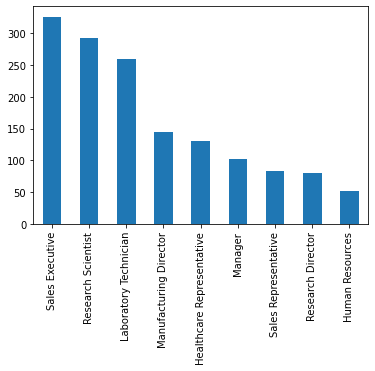

In [6]:
label_counts = df.JobRole.value_counts()
label_counts.plot.bar()

### Bar Plots with all numerical features

In [8]:
num_col=[]
for i in df.columns:
    if(df[i].dtypes!=object and df[i].nunique()<30):
        print(i, df[i].unique())
        num_col.append(i)

Attrition [1 0]
DistanceFromHome [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education [2 1 4 3 5]
EmployeeCount [1]
EnvironmentSatisfaction [2 3 4 1]
JobInvolvement [3 2 4 1]
JobLevel [2 1 3 4 5]
JobSatisfaction [4 2 3 1]
NumCompaniesWorked [8 1 6 9 0 4 5 2 7 3]
PercentSalaryHike [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
PerformanceRating [3 4]
RelationshipSatisfaction [1 4 2 3]
StandardHours [80]
StockOptionLevel [0 1 3 2]
TrainingTimesLastYear [0 3 2 5 1 4 6]
WorkLifeBalance [1 3 2 4]
YearsInCurrentRole [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
YearsSinceLastPromotion [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
YearsWithCurrManager [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>],
       [<AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>],
       [<AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'Relations

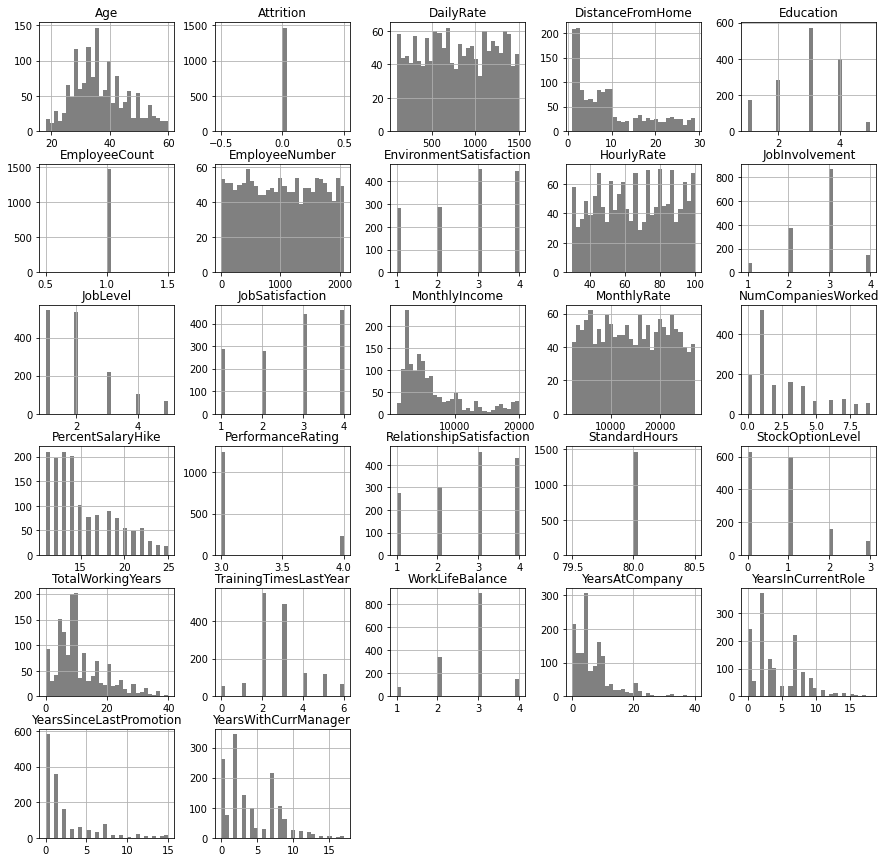

In [9]:
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df.hist(bins = 30, figsize= (15, 15), color = 'grey')

From these graphs we can see that Standard Hours, Employee Number and Employee Count have no impact on the attrition rate.

###  Heat Map: Correlation (Independent Variable Correlation Analysis)

<AxesSubplot:>

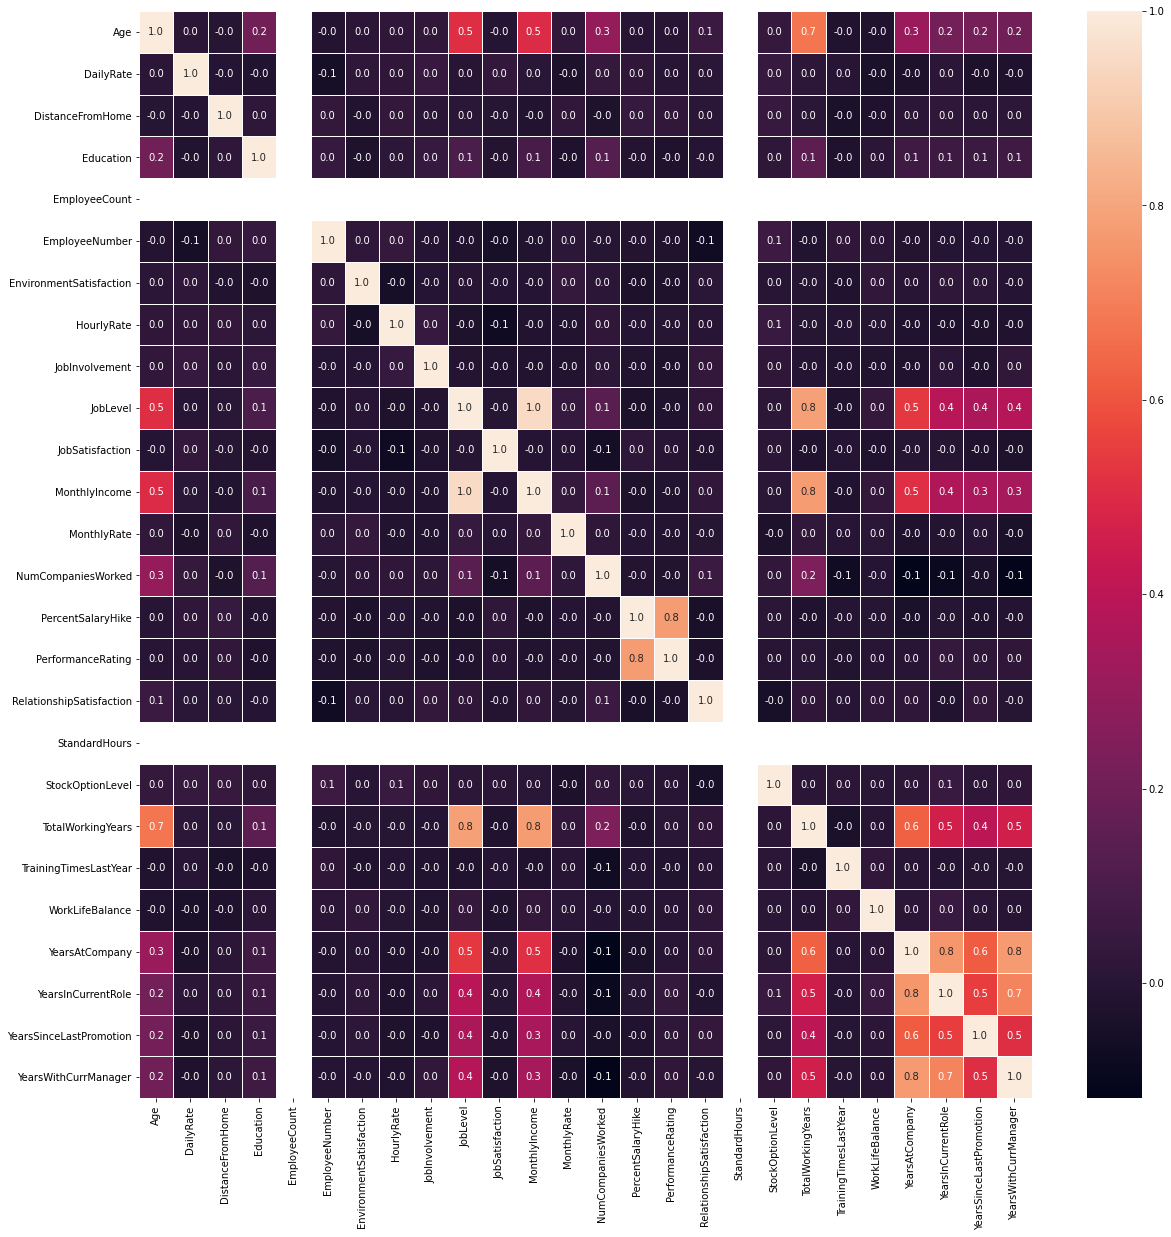

In [10]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,linewidth=.5,fmt='.1f')

Above Heatmap demonstrates the correlation between all the numerical features. It shows Job Level and Monthly Income has a strong correlation. Hence, Performance rating is directly proportional to salary hike.

### Doughnut Chart: Department & Job Role

In [13]:
Attr_yes=df[df['Attrition']=='Yes']
Attr_no=df[df['Attrition']=='No']

dept_count_yes=Attr_yes['EducationField'].value_counts()
dept_count_no=Attr_no['EducationField'].value_counts()
job_role_yes=Attr_yes['JobRole'].value_counts()
job_role_no=Attr_no['JobRole'].value_counts()

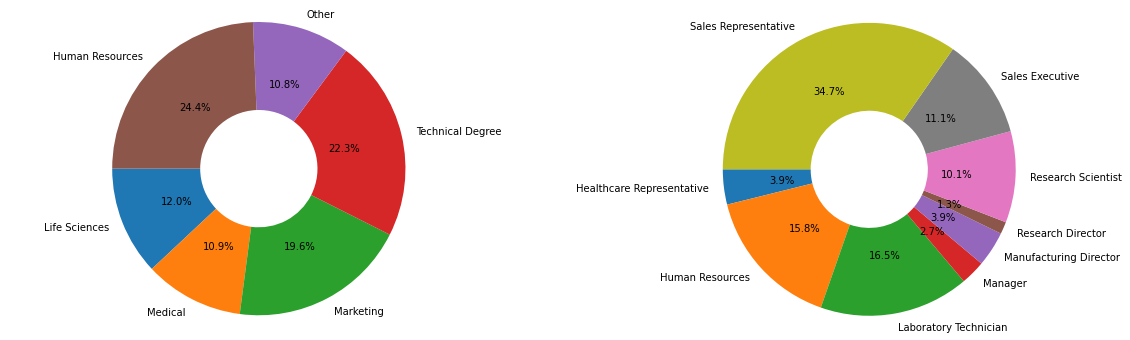

In [14]:
fig, axes = plt.subplots(1,2, figsize=(20, 6))

# Shape and Thickness
axes[0].pie((dept_count_yes*100/dept_count_no), wedgeprops=dict(width=0.6), labels=(dept_count_yes/dept_count_no).index,autopct='%1.1f%%', startangle=180);
axes[0].text(0., 0., '', horizontalalignment='center', verticalalignment='center')
axes[0].axis('equal')

#Main plot

axes[1].pie((job_role_yes*100/job_role_no), wedgeprops=dict(width=0.6), labels=(job_role_yes/job_role_no).index,autopct='%1.1f%%', startangle=180);
axes[1].text(0., 0., '', horizontalalignment='center', verticalalignment='center')
axes[1].axis('equal')
plt.show()

From the above donut charts across department and job role. Human Resources and Technical Degree had most attrition rate. While Sales representative job role was most impacted by attrition.

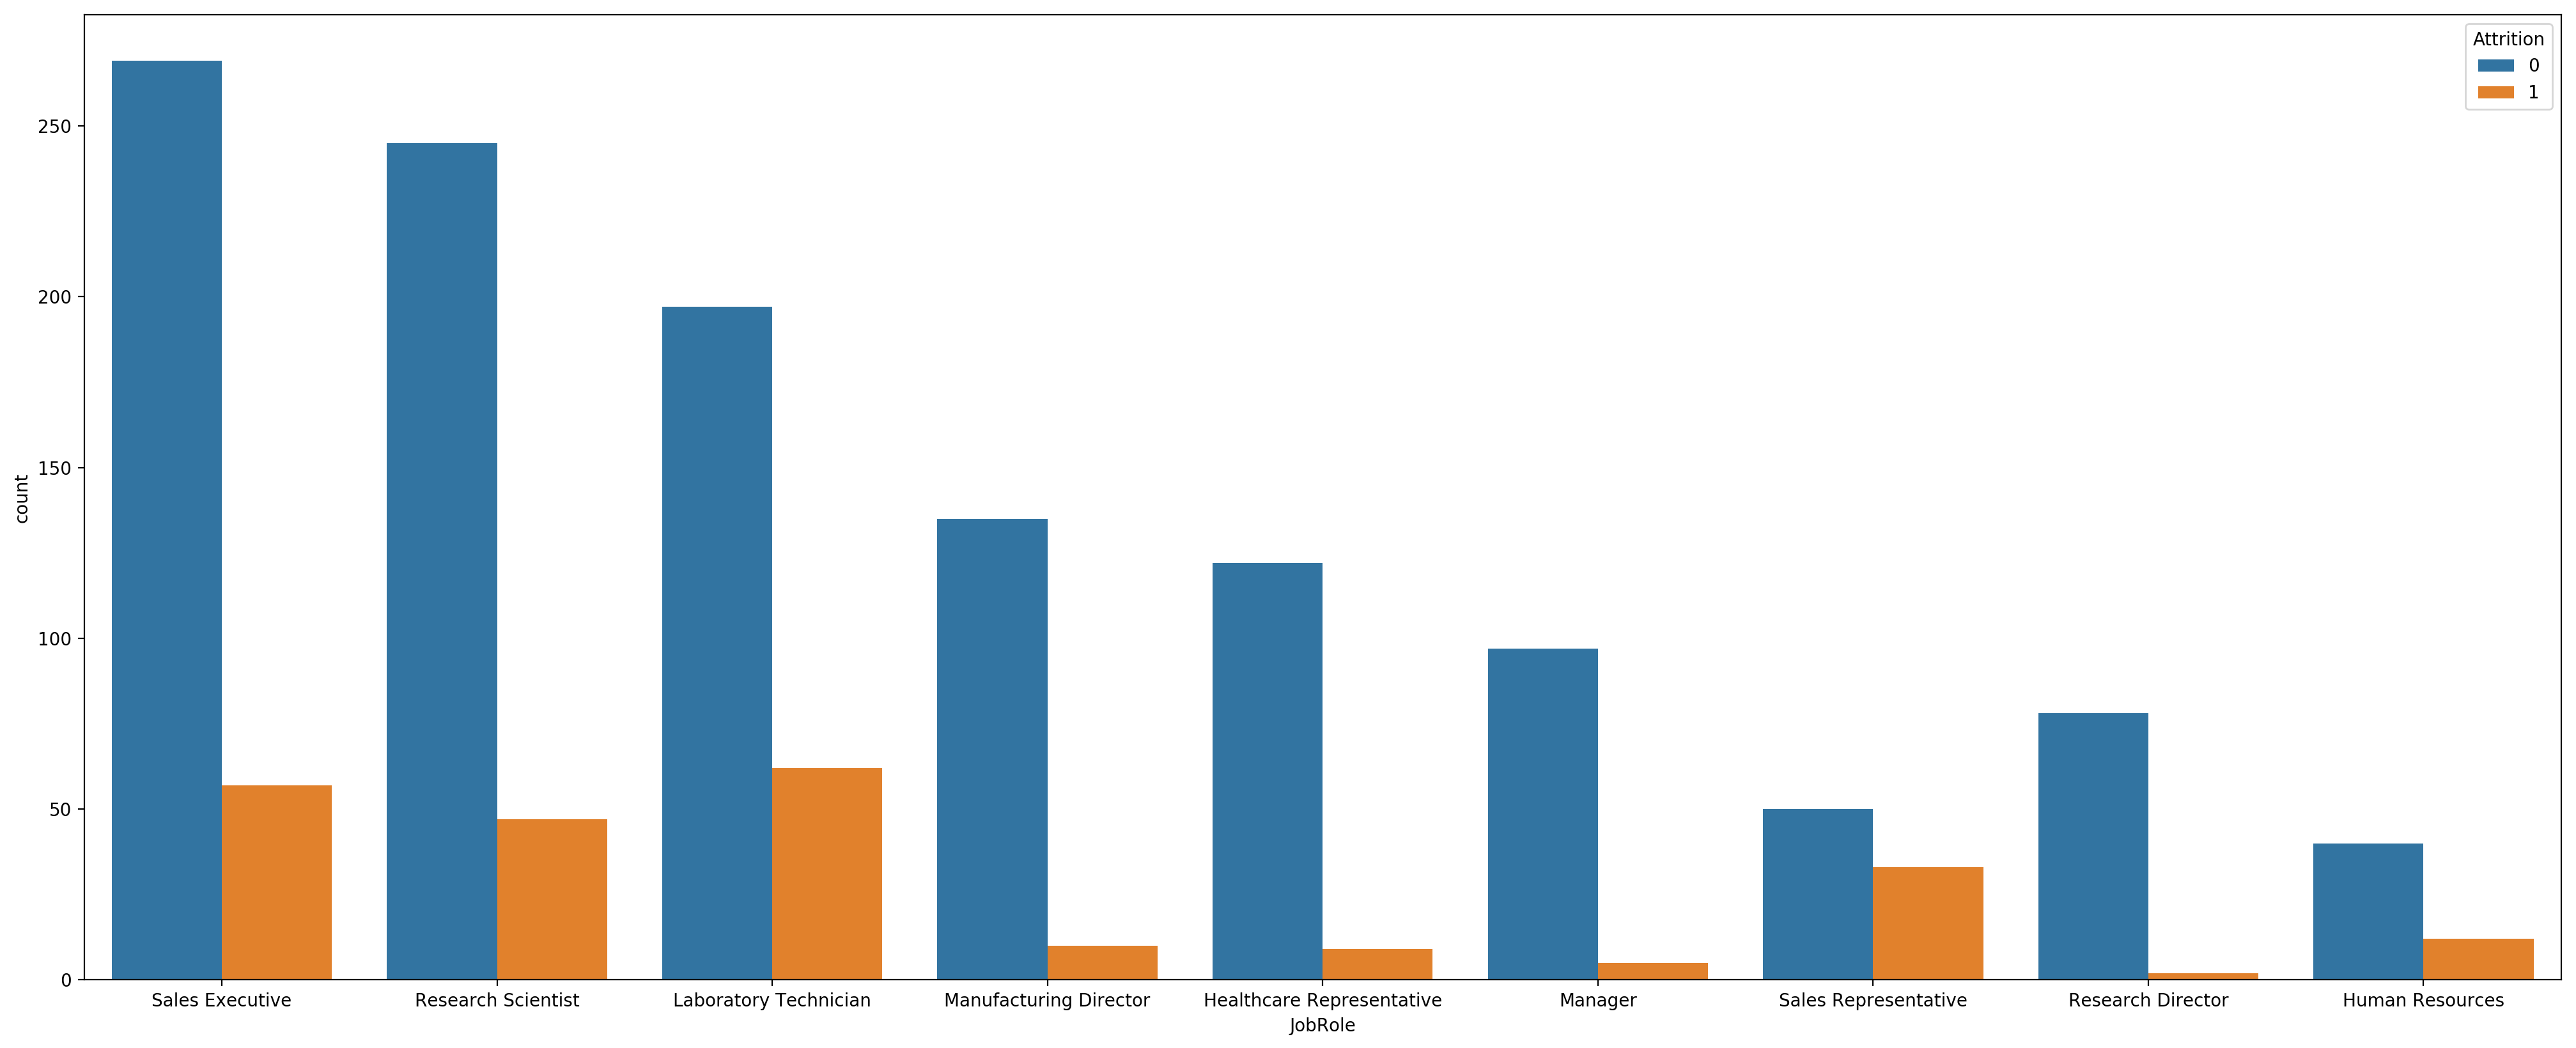

In [22]:
plt.figure(figsize = (25,10), dpi = 200)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = df)

Sales Representative, Laboratory Tech. and Sales Executive has highest attrition rate comparatively

### Scatter Plot: Promotion vs. Attrition 

C:\Users\97150\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


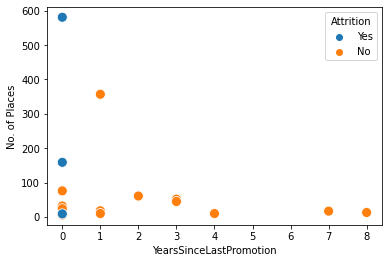

In [15]:
yearpromo_count_df=df['YearsSinceLastPromotion'].value_counts()
sns.scatterplot(df.YearsSinceLastPromotion, yearpromo_count_df, hue=df.Attrition, s=100)
plt.xlabel("YearsSinceLastPromotion")
plt.ylabel("No. of Places");

From the above scatter plot, all the employees who attrited have got promotion in less than 1 year. While employees who haven't got promotion are still with the company. It shows the pattern that employees maybe wait in a company until they get promotion and start looking for opportunities outside as soon as they get promoted.

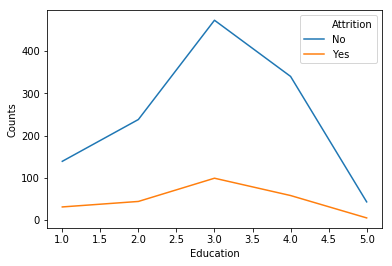

In [7]:
education_attrition = df.groupby(['Education','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
sns.lineplot(data=education_attrition, x='Education',y='Counts',hue='Attrition')

This plot shows that across all education category, attrition rate is higher among those who have bachelors

### Box Plot: Gender wise job satisfaction

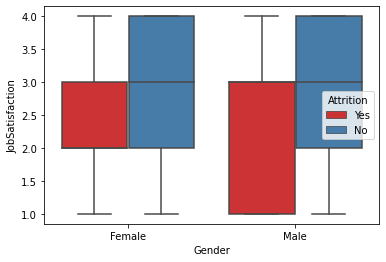

In [16]:
ax=sns.boxplot(x=df["Gender"],y=df['JobSatisfaction'],hue=df['Attrition'],palette="Set1",linewidth=1.5)


For individuals who stayed in the organization, distribution of job satisfaction is same irrespective of gender. While amongst those who left, females had lower job satisfaction.

### Count Plot: Age by Attrition status (ResponseVariable Correlation Aanalysis)

<AxesSubplot:xlabel='Age', ylabel='count'>

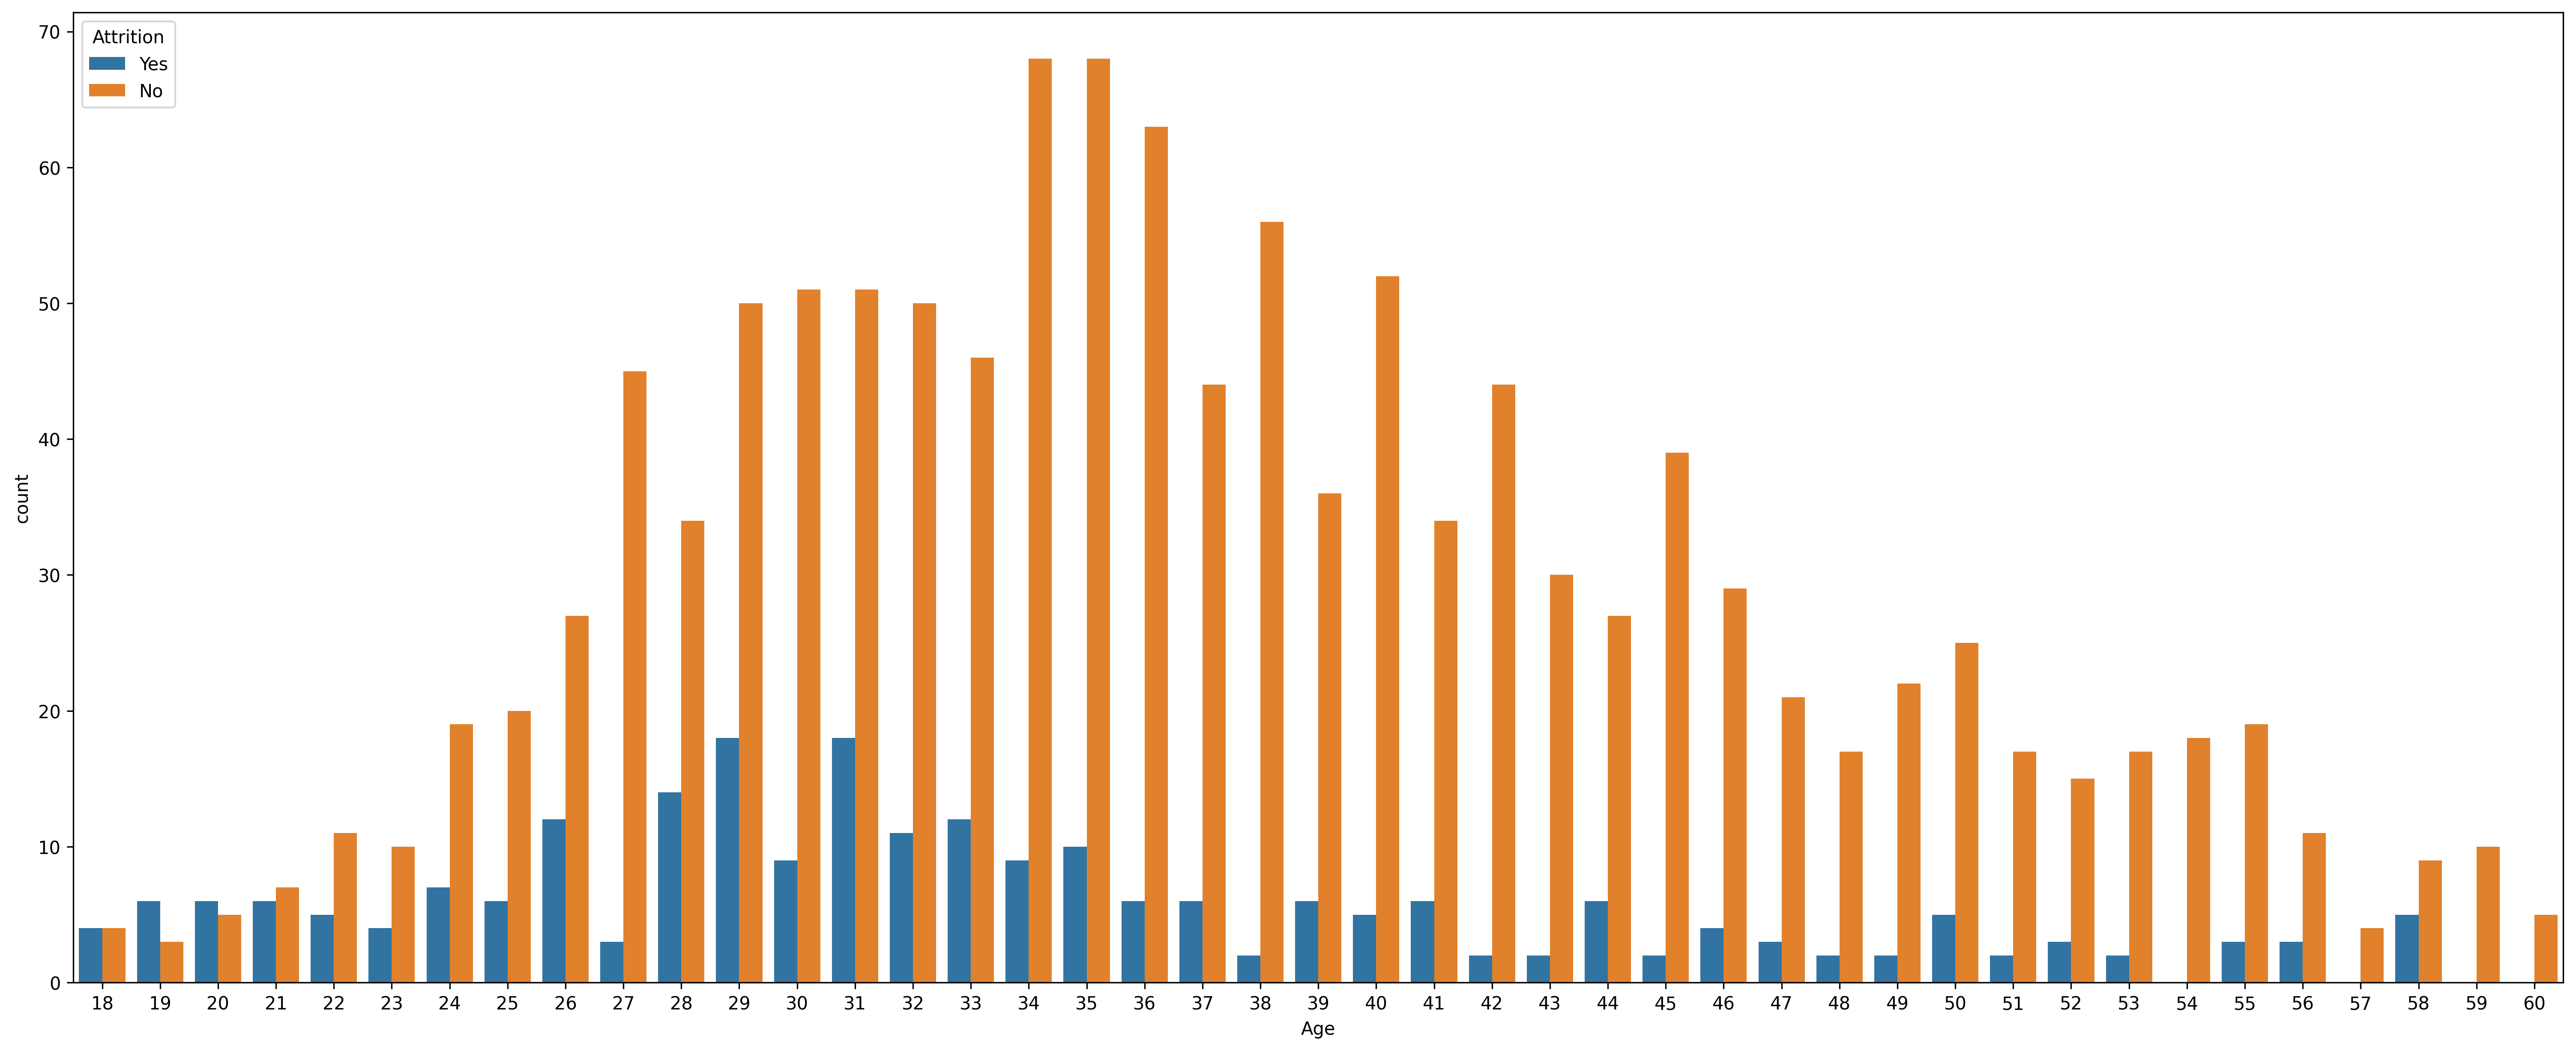

In [17]:
plt.figure(figsize = (25, 10), dpi = 300)
sns.countplot(x = 'Age', hue = 'Attrition', data = df)

From the above count plot, employees between 25–35, show a high leave ratio compared to the others. Below 21, a very high leave percentage can be spotted. Hence, indicating young professionals are more likely to leave the firm.

## 4. Classification Models
### 4.1. Prepare for training

According to the description of the datasets, pre-processing was already completed. Therefore, our next steps are to just prepare and pass the data into the models that we want to predict.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from collections import Counter
from sklearn.model_selection import train_test_split

### Drop columns that contain no information 

In [20]:
# Drop columns that contain no information, i.e. - all values are the same
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)
print(df.shape)

(1470, 32)


### Categorical to Numerical label transformation

In [21]:
# Transform Attrition from categorical to numerical label.
df['Attrition'] = df['Attrition'].astype('category')
# Assigning numerical values and storing in another column
df['Attrition_index'] = df['Attrition'].cat.codes

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [23]:
# convert all strings to integers
df_with_label_encoder = MultiColumnLabelEncoder(columns = ["BusinessTravel", "Department",'EducationField','Gender', 'JobRole', 'MaritalStatus', 'OverTime']).fit_transform(df)

In [24]:
df_with_label_encoder.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_index
0,41,Yes,2,1102,2,1,2,1,1,2,...,1,0,8,0,1,6,4,0,5,1
1,49,No,1,279,1,8,1,1,2,3,...,4,1,10,3,3,10,7,1,7,0
2,37,Yes,2,1373,1,2,2,4,4,4,...,2,0,7,3,3,0,0,0,0,1


### Split data into X and y

In [25]:
df_with_label_encoder.drop("Attrition", axis=1, inplace=True)
# Split df into X and y
y = df_with_label_encoder['Attrition_index']
X = df_with_label_encoder.drop('Attrition_index', axis=1)

print(X.shape)
print(y.shape)

(1470, 31)
(1470,)


### Train-test split

In [26]:
#Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

print('Train dataset: ', X_train.shape)
print('Test dataset: ', X_test.shape)

Train dataset:  (1176, 31)
Test dataset:  (294, 31)


## 4.2. Model 1: Logistic Regression

In [27]:
#Fit LR model

from sklearn.linear_model import LogisticRegression
from scipy.stats import loguniform

from warnings import simplefilter

# define model
model = LogisticRegression(solver='liblinear', random_state=42)

y_score = model.fit(X_train, y_train).predict(X_test)

### Metrics on test set predictions 

In [28]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

# Report metrics on test set predictions
# Test areaUnderROC
print(f"Test set areaUnderROC: {roc_auc_score(y_test, y_score)}")
# Test Accuracy
print(f"Test set accuracy: {accuracy_score(y_test, y_score)}")
# Test F1-score
print(f"Test set F1-score: {f1_score(y_test, y_score)}")


Test set areaUnderROC: 0.5395173453996983
Test set accuracy: 0.8605442176870748
Test set F1-score: 0.163265306122449


## 4.3. Model 2: Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define model
model = RandomForestClassifier()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
# define search space
space = dict()
space['n_estimators'] = [3, 5, 10, 20, 30, 40]
# define search
search = GridSearchCV(model, space, scoring='roc_auc', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7955327271934415
Best Hyperparameters: {'n_estimators': 30}


In [30]:
from pandas.core.common import random_state
# Make predictions on test set
best_model_rf = RandomForestClassifier(max_depth=10, n_estimators= 40, random_state=42)
y_score = best_model_rf.fit(X_train, y_train).predict(X_test)

### Metrics on test set predictions  

In [31]:
# Report metrics on test set predictions
# Test areaUnderROC
print(f"Test set areaUnderROC: {roc_auc_score(y_test, y_score)}")
# Test Accuracy
print(f"Test set accuracy: {accuracy_score(y_test, y_score)}")
# Test F1-score
print(f"Test set F1-score: {f1_score(y_test, y_score)}")


Test set areaUnderROC: 0.5473604826546004
Test set accuracy: 0.8741496598639455
Test set F1-score: 0.17777777777777778


### Feature Importance 

Text(0.5, 0, 'Random Forest Feature Importance')

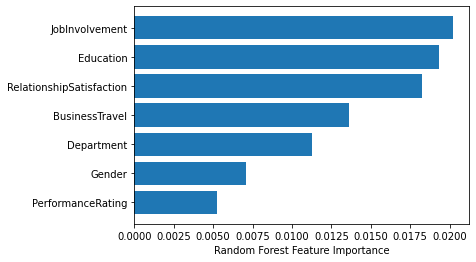

In [32]:
sorted_idx = best_model_rf.feature_importances_.argsort()[0:7]
plt.barh(X.columns[sorted_idx], best_model_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### Model Comparision:
When compared across multiple metrics like accuracy, F1 score, area under ROC curve, the RF model beat the LR model. 

## 5. Constraints & Future Work
We will limit our data analysis to only one specific company, IBM, using information we found on Kaggle. Our research and analysis are solely based on determining the main cause of employee turnover, and what can be done to promote employee retention.

Potential improvements include doing further analysis to determine different means of incentives, and who and when is it best to reward an employee before it is too late.

## 6. Conclusion

After running each model, we saw that the Random Forest model was the clear winner.
The usage of data analytics in this area may help businesses target high-risk and high-performing individuals for retention initiatives, and it can even help them make evidence-based decisions about incentive payments and equity grant distributions. In today's fast-changing and highly competitive world, this knowledge is vital.